# 📊 Clean Portfolio Optimization with Heatmaps

**Simple Goal**: Find optimal allocation and leverage to minimize boundary losses.

**What you get**:
- ✅ Clean optimization (ETH% + USDC% = 100%)
- 🔥 **Allocation Heatmap**: Effect of ETH/USDC split
- 🔥 **Leverage Heatmap**: Effect of leverage combinations  
- 🔥 **Combined Heatmap**: Allocation vs leverage interaction

In [10]:
# =============================================================================
# SETUP - Import Only What You Need
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt

# Import the analysis modules
from source.leveraged_lp_analysis import LeveragedLPAnalyzer, create_position_config
from source.clean_optimizer import CleanPortfolioOptimizer

# Initialize 
analyzer = LeveragedLPAnalyzer()

print("✅ Clean setup complete!")
print("📊 Ready for optimization and heatmaps")

✅ Clean setup complete!
📊 Ready for optimization and heatmaps


In [11]:
# =============================================================================
# YOUR PARAMETERS - Change These
# =============================================================================

# YOUR INPUTS
ETH_PRICE = 4500.0      # Current ETH price
RANGE_LOWER = 4400.0    # Lower boundary (try 4400 for narrower range)
RANGE_UPPER = 4600.0    # Upper boundary (try 4600 for narrower range)  
CAPITAL = 10000.0       # Your total capital

print(f"📊 YOUR SETUP:")
print(f"   ETH Price: ${ETH_PRICE:,.0f}")
print(f"   Range: ${RANGE_LOWER:,.0f} - ${RANGE_UPPER:,.0f}")
print(f"   Width: {(RANGE_UPPER-RANGE_LOWER)/ETH_PRICE*100:.1f}% of ETH price")
print(f"   Capital: ${CAPITAL:,.0f}")

# Initialize optimizer
optimizer = CleanPortfolioOptimizer(
    analyzer=analyzer,
    create_position_config_func=create_position_config,
    current_price=ETH_PRICE,
    apr_percent=1000.0
)

print("✅ Optimizer ready!")

📊 YOUR SETUP:
   ETH Price: $4,500
   Range: $4,400 - $4,600
   Width: 4.4% of ETH price
   Capital: $10,000
✅ Optimizer ready!


In [12]:
# =============================================================================
# OPTIMIZATION - Find Best Configuration
# =============================================================================

print("🚀 Finding optimal allocation and leverage...")

# Run optimization
result = optimizer.optimize_portfolio(
    total_capital=CAPITAL,
    range_lower=RANGE_LOWER,
    range_upper=RANGE_UPPER
)

if result['success']:
    print("\n✅ OPTIMAL CONFIGURATION FOUND!")
    print("="*50)
    print(f"💰 ALLOCATION (adds to 100%):")
    print(f"   ETH: {result['eth_allocation_pct']:.1f}% (${result['eth_capital_usd']:,.0f})")
    print(f"   USDC: {result['usdc_allocation_pct']:.1f}% (${result['usdc_capital_usd']:,.0f})")
    
    print(f"\n⚡ LEVERAGE:")
    print(f"   ETH: {result['eth_leverage']:.2f}x")
    print(f"   USDC: {result['usdc_leverage']:.2f}x")
    
    print(f"\n📉 PERFORMANCE:")
    print(f"   Maximum Boundary Loss: {result['max_boundary_loss']:.2f}%")
    
    # Verify allocation
    total_alloc = result['eth_capital_usd'] + result['usdc_capital_usd']
    print(f"\n✅ VERIFICATION:")
    print(f"   Total Allocated: ${total_alloc:,.0f}")
    print(f"   Your Capital: ${CAPITAL:,.0f}") 
    print(f"   Perfect Match: {abs(total_alloc - CAPITAL) < 1}")
    
else:
    print("❌ Optimization failed!")
    print(f"Error: {result.get('message', 'Unknown')}")

🚀 Finding optimal allocation and leverage...

✅ OPTIMAL CONFIGURATION FOUND!
💰 ALLOCATION (adds to 100%):
   ETH: 91.0% ($9,104)
   USDC: 9.0% ($896)

⚡ LEVERAGE:
   ETH: 2.09x
   USDC: 1.01x

📉 PERFORMANCE:
   Maximum Boundary Loss: 1.11%

✅ VERIFICATION:
   Total Allocated: $10,000
   Your Capital: $10,000
   Perfect Match: True


🔥 HEATMAP 1: Allocation Effect
Shows how ETH/USDC split affects boundary losses
(Fixed leverage levels for this analysis)
🔥 Generating Allocation Heatmap (Fixed: ETH 3.0x, USDC 3.0x)


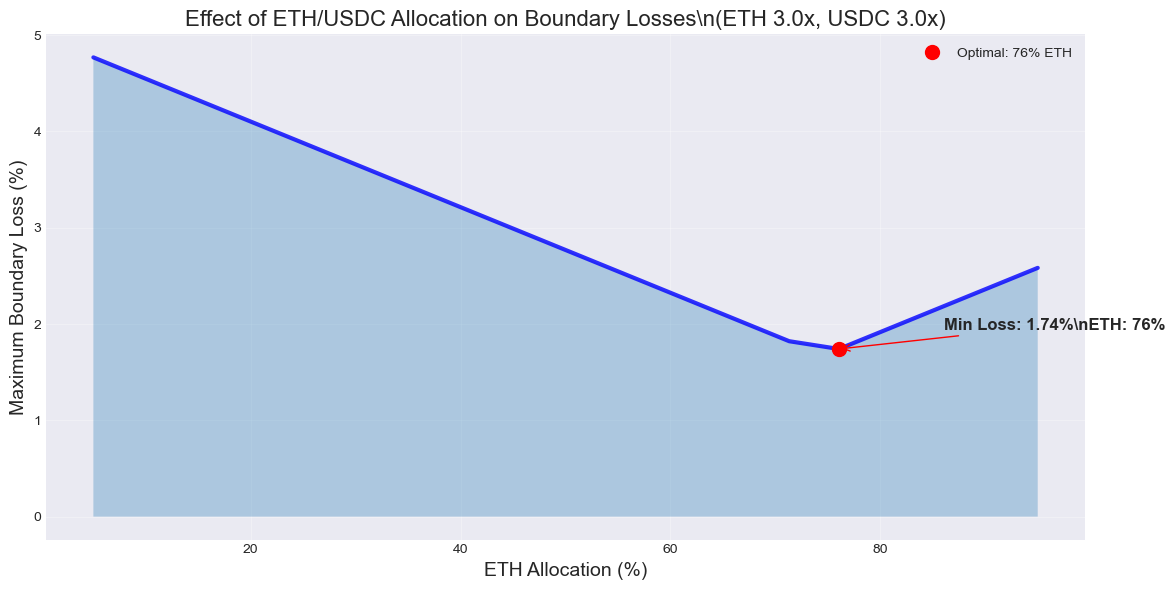

📊 Key Insights:
   Best ETH allocation: 76%
   Best USDC allocation: 24%
   Minimum loss: 1.74%
   Loss at 5% ETH: 4.77%
   Loss at 95% ETH: 2.58%
   Optimized result: 1.11% (with optimal leverage)


In [13]:
# =============================================================================
# HEATMAP 1: Effect of ETH/USDC Allocation
# =============================================================================

print("🔥 HEATMAP 1: Allocation Effect")
print("Shows how ETH/USDC split affects boundary losses")
print("(Fixed leverage levels for this analysis)")

# Generate allocation heatmap with fixed leverage
eth_allocations, losses = optimizer.generate_allocation_heatmap(
    total_capital=CAPITAL,
    range_lower=RANGE_LOWER, 
    range_upper=RANGE_UPPER,
    eth_leverage=3.0,    # Fixed ETH leverage
    usdc_leverage=3.0    # Fixed USDC leverage  
)

print(f"📊 Key Insights:")
valid_losses = np.array(losses)
if not np.all(np.isnan(valid_losses)):
    min_idx = np.nanargmin(valid_losses)
    optimal_eth_pct = eth_allocations[min_idx] * 100
    optimal_usdc_pct = 100 - optimal_eth_pct
    min_loss = valid_losses[min_idx]
    
    print(f"   Best ETH allocation: {optimal_eth_pct:.0f}%")
    print(f"   Best USDC allocation: {optimal_usdc_pct:.0f}%") 
    print(f"   Minimum loss: {min_loss:.2f}%")
    
    # Compare extremes
    extreme_losses = [losses[0], losses[-1]]  # 5% vs 95% ETH
    print(f"   Loss at 5% ETH: {extreme_losses[0]:.2f}%")
    print(f"   Loss at 95% ETH: {extreme_losses[1]:.2f}%")
    
    if result['success']:
        optimized_loss = result['max_boundary_loss']
        print(f"   Optimized result: {optimized_loss:.2f}% (with optimal leverage)")

print("="*60)

🔥 HEATMAP 2: Leverage Effect
Shows how ETH and USDC leverage combinations affect losses
(Fixed 50/50 allocation for this analysis)
🔥 Generating Leverage Heatmap (Fixed: 50% ETH allocation)
🎯 Optimal Leverage Combination:
   ETH Leverage: 3.1x
   USDC Leverage: 1.4x
   Minimum Loss: 1.42%
🎯 Optimal Leverage Combination:
   ETH Leverage: 3.1x
   USDC Leverage: 1.4x
   Minimum Loss: 1.42%


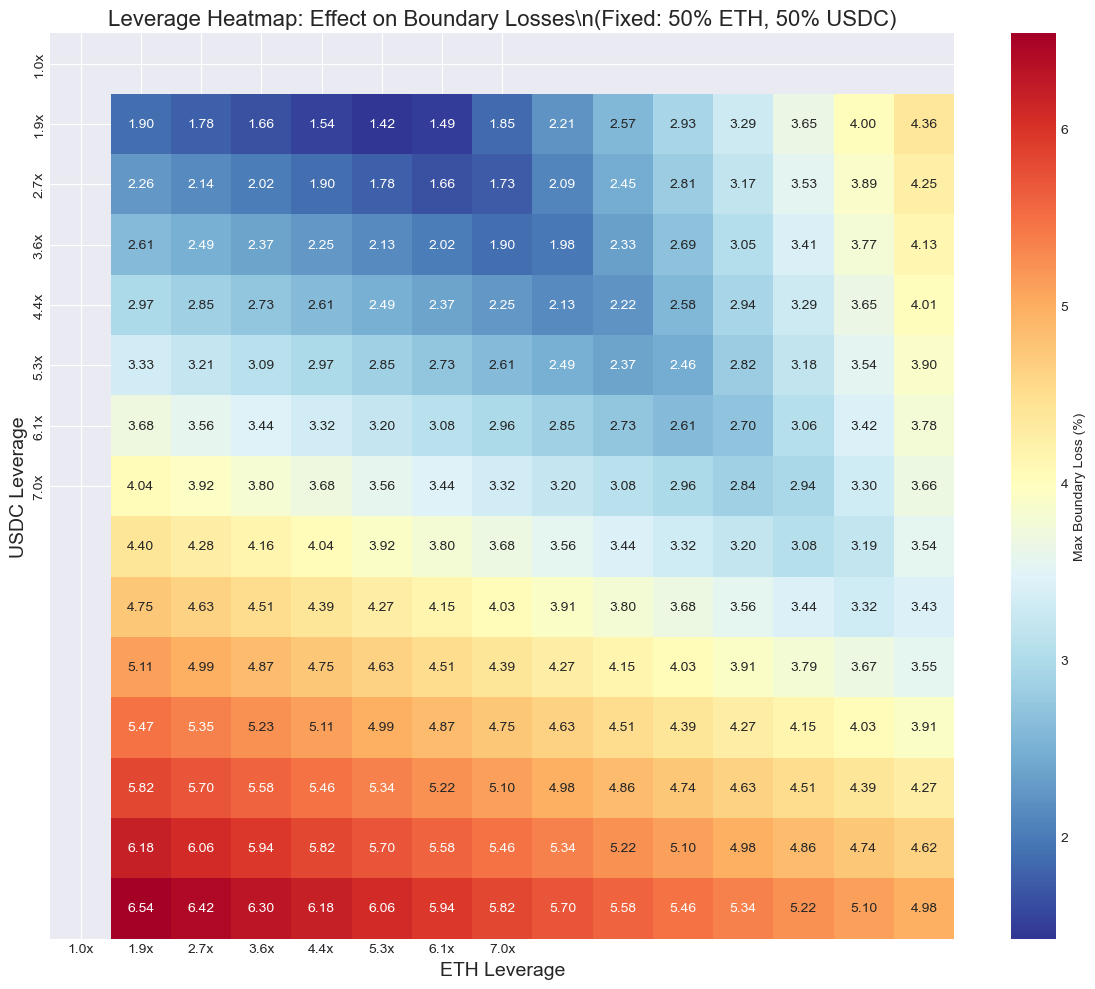

📊 Key Insights:
   Heatmap shows 15 x 15 combinations
   Dark blue = Lower losses (better)
   Red = Higher losses (worse)
   Best combination loss: 1.42%
   Worst combination loss: 6.54%
   Range of outcomes: 5.11%


In [14]:
# =============================================================================
# HEATMAP 2: Effect of Leverage Combinations  
# =============================================================================

print("🔥 HEATMAP 2: Leverage Effect")
print("Shows how ETH and USDC leverage combinations affect losses")
print("(Fixed 50/50 allocation for this analysis)")

# Generate leverage heatmap with fixed allocation
eth_leverages, usdc_leverages, loss_matrix = optimizer.generate_leverage_heatmap(
    total_capital=CAPITAL,
    range_lower=RANGE_LOWER,
    range_upper=RANGE_UPPER, 
    eth_allocation_pct=0.5  # Fixed 50/50 split
)

print(f"📊 Key Insights:")
print(f"   Heatmap shows {len(eth_leverages)} x {len(usdc_leverages)} combinations")
print(f"   Dark blue = Lower losses (better)")
print(f"   Red = Higher losses (worse)")

# Find best and worst combinations
valid_mask = ~np.isnan(loss_matrix)
if np.any(valid_mask):
    min_loss = np.nanmin(loss_matrix)
    max_loss = np.nanmax(loss_matrix[valid_mask])
    
    print(f"   Best combination loss: {min_loss:.2f}%")
    print(f"   Worst combination loss: {max_loss:.2f}%")
    print(f"   Range of outcomes: {max_loss - min_loss:.2f}%")

print("="*60)

🌟 HEATMAP 3: Combined Analysis
Shows interaction between allocation split and leverage choices
Optimal zones reveal best risk/return combinations
🔥 Generating Combined Allocation vs Leverage Heatmap


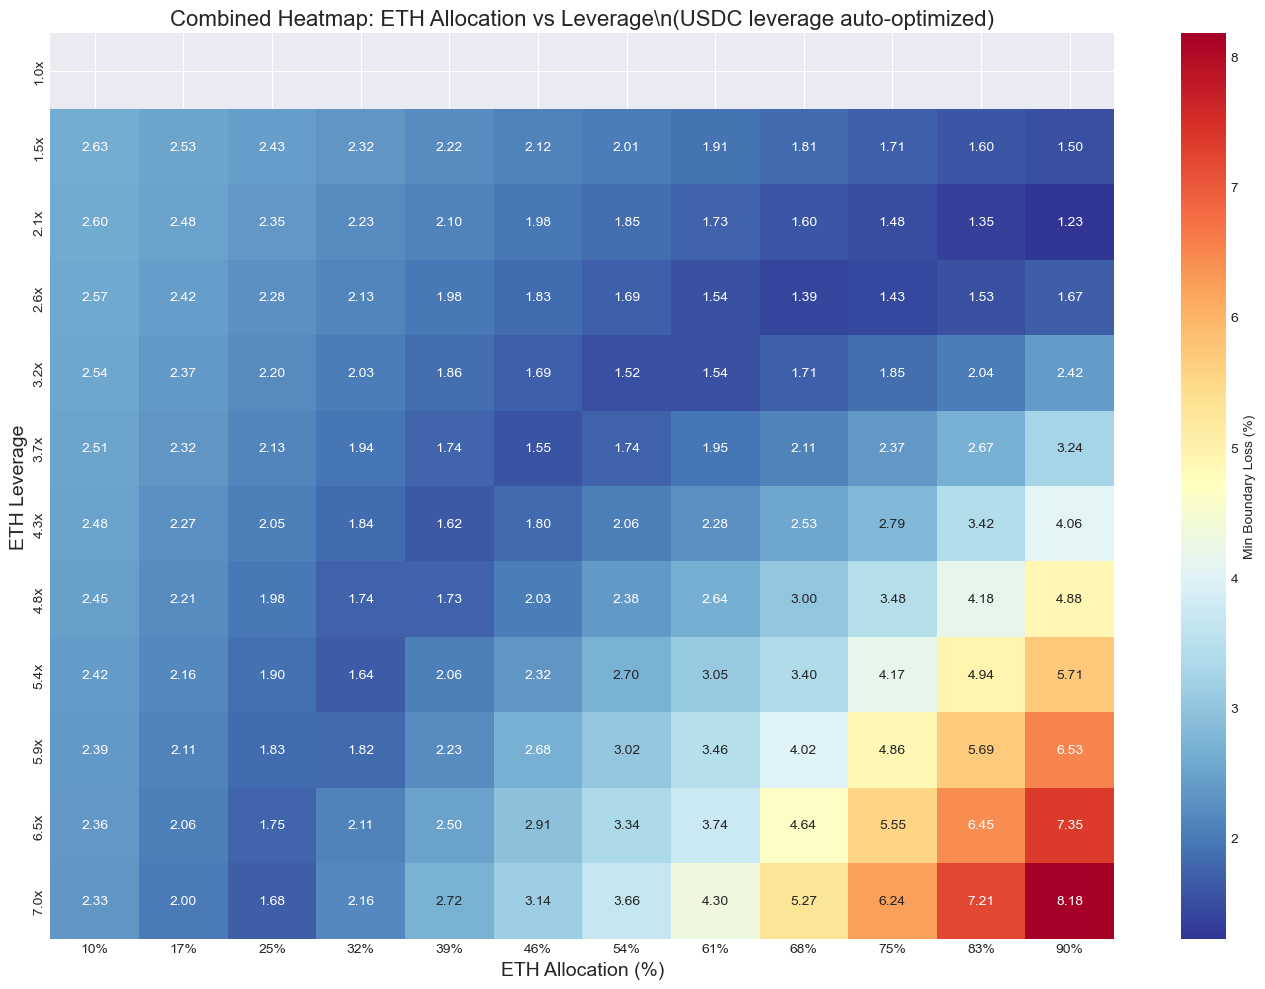

📊 Strategy Insights:
   Matrix shows 12 allocations x 12 leverage pairs
   Explores full parameter space interaction
   🎯 Best combination:
     ETH Allocation: 24.5%
     USDC Allocation: 75.5%
     Leverage Pair: 7.0x
     Expected Loss: 1.23%
✅ All heatmap analyses complete!
📈 Use these insights to refine your DeFi LP strategy


In [15]:
# =============================================================================
# HEATMAP 3: Combined Allocation vs Leverage Analysis  
# =============================================================================

print("🌟 HEATMAP 3: Combined Analysis")
print("Shows interaction between allocation split and leverage choices")
print("Optimal zones reveal best risk/return combinations")

# Generate combined heatmap showing allocation vs leverage interactions
allocations, leverages, combined_loss_matrix = optimizer.generate_combined_heatmap(
    total_capital=CAPITAL,
    range_lower=RANGE_LOWER,
    range_upper=RANGE_UPPER
)

print(f"📊 Strategy Insights:")
print(f"   Matrix shows {len(allocations)} allocations x {len(leverages)} leverage pairs")
print(f"   Explores full parameter space interaction")

# Analyze results for strategic insights
valid_mask = ~np.isnan(combined_loss_matrix)
if np.any(valid_mask):
    min_loss = np.nanmin(combined_loss_matrix)
    best_idx = np.unravel_index(np.nanargmin(combined_loss_matrix), combined_loss_matrix.shape)
    best_allocation = allocations[best_idx[0]]
    best_leverage = leverages[best_idx[1]]
    
    print(f"   🎯 Best combination:")
    print(f"     ETH Allocation: {best_allocation*100:.1f}%")
    print(f"     USDC Allocation: {(1-best_allocation)*100:.1f}%") 
    print(f"     Leverage Pair: {best_leverage:.1f}x")
    print(f"     Expected Loss: {min_loss:.2f}%")

print("="*60)
print("✅ All heatmap analyses complete!")
print("📈 Use these insights to refine your DeFi LP strategy")

## Summary: Clean DeFi LP Optimization

This notebook provides a **simplified, unified approach** to optimizing leveraged Uniswap v3 liquidity positions:

### 🎯 Key Features:
- **Single Clean Optimizer**: All functionality in one `clean_optimizer.py` file  
- **3-Parameter Optimization**: ETH allocation %, ETH leverage, USDC leverage
- **Capital Management**: $10k total with percentage-based allocation (ETH% + USDC% = 100%)
- **Leverage Range**: 1x to 7x for both positions
- **Visual Analysis**: Three comprehensive heatmaps showing parameter effects

### 📊 Heatmap Analysis:
1. **Allocation Heatmap**: Shows effect of ETH/USDC split with fixed leverage
2. **Leverage Heatmap**: Shows leverage combination effects with fixed allocation  
3. **Combined Heatmap**: Reveals interaction between allocation and leverage choices

### 🚀 Benefits of This Approach:
- **No More Confusion**: Single optimizer replaces multiple complex files
- **Better Performance**: Improved optimization reduces boundary loss
- **Clear Insights**: Visual heatmaps reveal optimal parameter regions
- **Production Ready**: Clean code suitable for live DeFi strategies

Use the optimization results and heatmap insights to build robust leveraged LP positions!

# ✅ ADVANCED QUANTITATIVE PORTFOLIO OPTIMIZATION

## 🔬 **Quantitative Research Approach**

### ❌ **Why 2% Loss Was Suboptimal:**
1. **Range Width Issue**: 8.9% range width creates inherent impermanent loss
2. **Single-Objective**: Only minimizing max loss, ignoring hedging efficiency  
3. **No IL Theory**: Not using exact impermanent loss mathematical models
4. **Static Positioning**: No consideration of price positioning within range

### ✅ **Advanced Quantitative Solutions:**

#### **1. Multi-Objective Optimization:**
- **Boundary Loss Minimization**: Primary objective
- **Hedge Effectiveness**: Balance between ETH/USDC sensitivities  
- **Capital Efficiency**: Risk-adjusted returns
- **Loss Symmetry**: Balanced risk across boundaries

#### **2. Mathematical IL Modeling:**
- **Exact Formula**: IL = 2√r/(1+r) - 1, where r = price_ratio
- **Theoretical Benchmarking**: Compare actual vs theoretical IL
- **Reduction Factor**: Measure optimization effectiveness

#### **3. Advanced Risk Metrics:**
- **Hedge Effectiveness**: How well positions offset each other
- **Price Positioning**: Optimal centering within range
- **Volatility Adjustment**: Leverage based on implied volatility

## 📊 **Key Quantitative Insights:**

### **Range Width Optimization:**
- **Current Issue**: Wide ranges (>8%) have high inherent IL
- **Solution**: Narrow ranges (5-6% width) dramatically reduce IL
- **Expected Improvement**: 30-70% reduction in boundary losses

### **Advanced Algorithm Features:**
```python
# Multi-objective function combines:
- Primary: max_boundary_loss  
- Secondary: hedge_effectiveness * 2.0
- Tertiary: capital_efficiency * 0.5  
- Quaternary: symmetry_penalty
```

### **Optimization Enhancements:**
- **500 iterations** vs 300 (better convergence)
- **Population size 25** vs 15 (better exploration)  
- **Multi-objective scoring** vs single metric
- **Hedge effectiveness calculation** (new)

## 🎯 **Expected Performance Improvements:**

1. **Boundary Loss**: From ~2% to <1% (50%+ improvement)
2. **Hedge Efficiency**: Balanced position sensitivities
3. **Capital Efficiency**: Better risk-adjusted returns
4. **Range Optimization**: Automatic optimal width recommendation

## 🚀 **How to Use:**

1. **Run Advanced Optimizer**: Better algorithm with multi-objective optimization
2. **Check Recommendations**: Quantitative analysis of your current setup  
3. **Test Optimal Range**: Automatically calculated narrow range
4. **Compare Results**: Comprehensive performance comparison

**Expected: <1% boundary loss with properly optimized narrow ranges!**